In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_csv("diabetes_dataset.csv")

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [5]:
def numerical_distro(data,numerical_feature):
    for column in numerical_feature:
        plt.figure(figsize=(12,5))
    
        plt.subplot(1,2,1)
        plt.title(f"HistPlot of {column}")
        plt.hist(data[column])
        plt.tight_layout()
        plt.xlabel(column)
        plt.ylabel("Frequency")

        plt.subplot(1,2,2)
        plt.title(f"BoxPlot of {column}")
        plt.boxplot(data[column])
        plt.tight_layout()
        plt.show()

        print(f"Skewness of Feature: {data[column].skew():.2f}")
        print(f"Null Values: {data[column].isnull().sum()}")


def categorical_distro(data,categorical_features,top_n = 10):
    for feature in categorical_features:
        unique_count = data[feature].nunique()

        if unique_count>top_n:
            # so if more that top n counts then ttaking the top category
            top_categories =  data[feature].value_counts().nlargest(top_n)
            sns.barplot(x = top_categories.index,y = top_categories.values)
            print(f"Top {top_n} Categories of {feature}")
        else:
            # Show all categories
            sns.countplot(x=data[feature], order=data[feature].value_counts().index)
            plt.title(f"Distribution of {feature}")

        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

        # Print stats
        print(f"Feature: {feature}")
        print(f"Number of Unique Values: {unique_count}")
        print(f"Missing Values: {data[feature].isnull().sum()}\n")

In [6]:
def numerical_corr_analysis(data,numerical_feature,target):
    for feature in numerical_feature:
        
        if numerical_feature != target:
            plt.figure(figsize=(10,6))
            sns.scatterplot(x= data[feature],y = data[target],alpha=0.5)
            plt.title(f"{feature} vs {target}")
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.show()
    corr_matrix = data[numerical_feature].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".3f")
    plt.title("Correlation Matrix of Numerical Features")
    plt.show()
    
def categorical_correlation_analysis(data, categorical_features, target, high_cardinality_threshold=10):
    """
    Visualizes categorical features against the target using boxplots.

    :param data: Pandas DataFrame containing the dataset
    :param categorical_features: List of categorical column names
    :param target: Name of the target variable
    :param high_cardinality_threshold: Max number of unique values allowed for plotting
    """
    for feature in categorical_features:
        if data[feature].nunique() <= high_cardinality_threshold:
            # Boxplot: target distribution per category
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=data[feature], y=data[target], palette='husl')
            plt.title(f"{feature} vs {target}")
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Skipping {feature}: too many unique values ({data[feature].nunique()})\n")
        

Target column Diabetes created based on Fasting_Blood_Glucose.


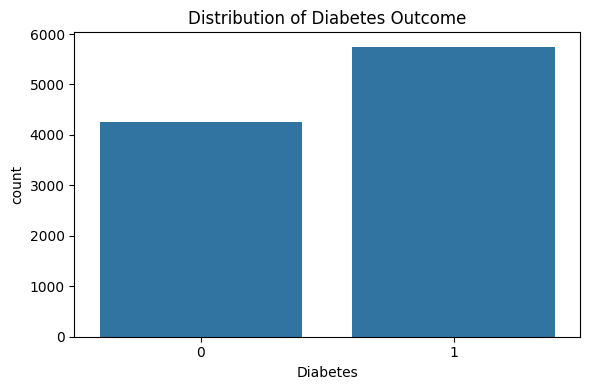

In [7]:
# Create a new binary target column 'Diabetes'
# Using a threshold of 125 (typical for fasting blood glucose in mg/dL)
if 'Fasting_Blood_Glucose' in df.columns:
    df['Diabetes'] = df['Fasting_Blood_Glucose'].apply(lambda x: 1 if x > 125 else 0)
    print('Target column Diabetes created based on Fasting_Blood_Glucose.')
else:
    print('Fasting_Blood_Glucose column not found. Please check the dataset.')

# Examine the distribution of the new target
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.tight_layout()
plt.show()

In [8]:
numerical_cols = ['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 
                 'HbA1c', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                 'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 
                 'GGT', 'Serum_Urate', 'Dietary_Intake_Calories',
                 'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes', 'Diabetes']

categorical_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 
                   'Alcohol_Consumption', 'Smoking_Status']

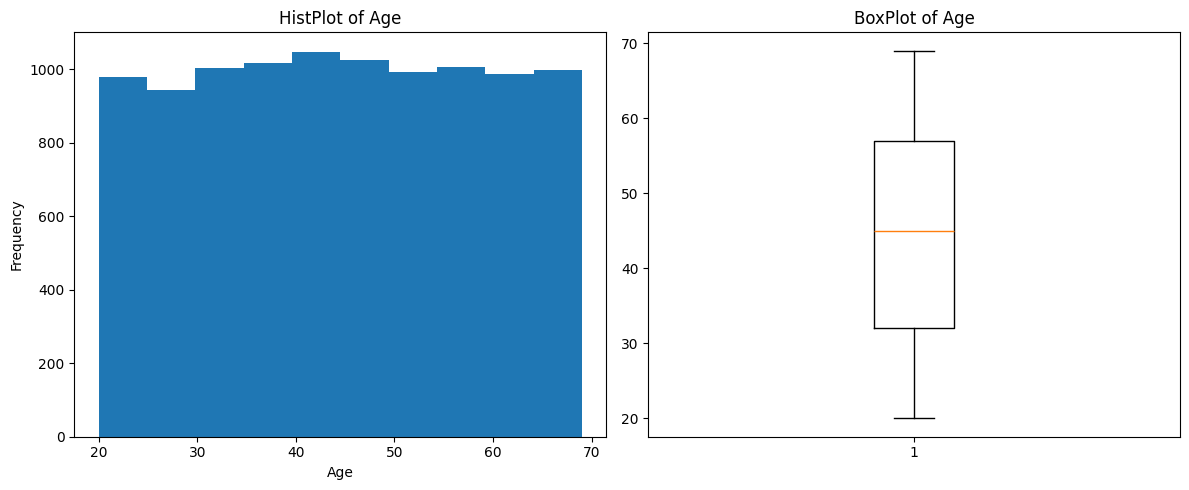

Skewness of Feature: -0.00
Null Values: 0


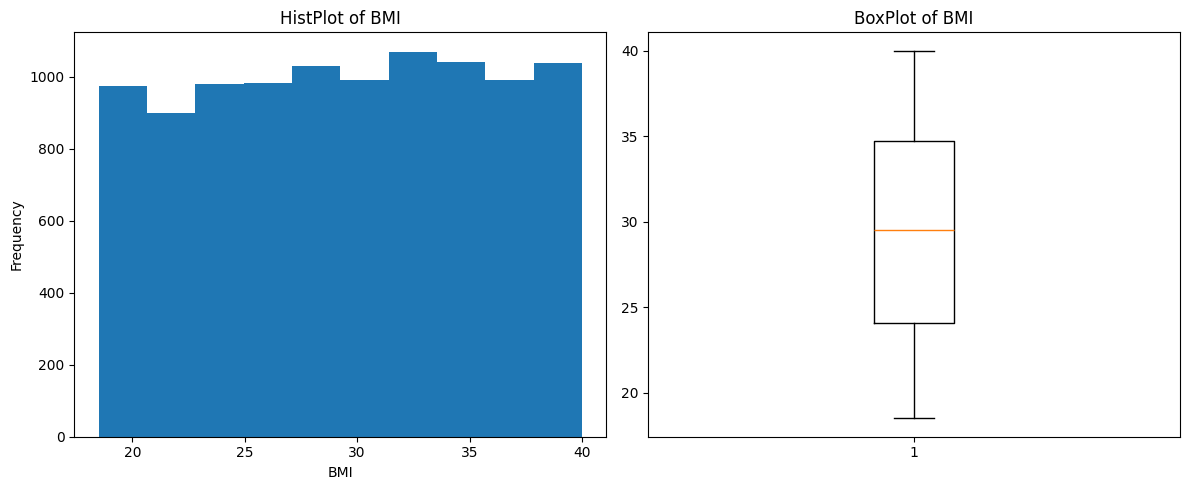

Skewness of Feature: -0.03
Null Values: 0


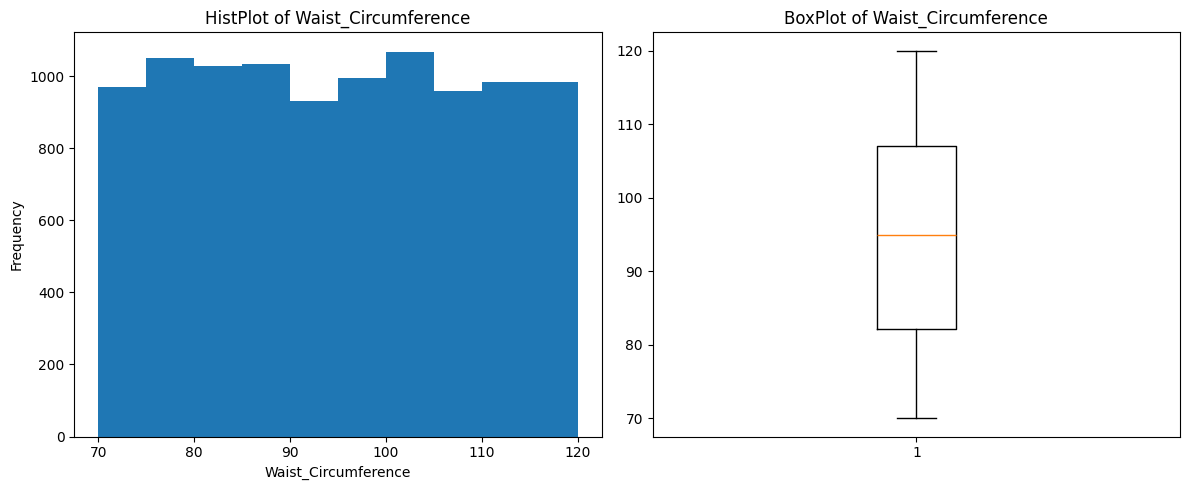

Skewness of Feature: 0.01
Null Values: 0


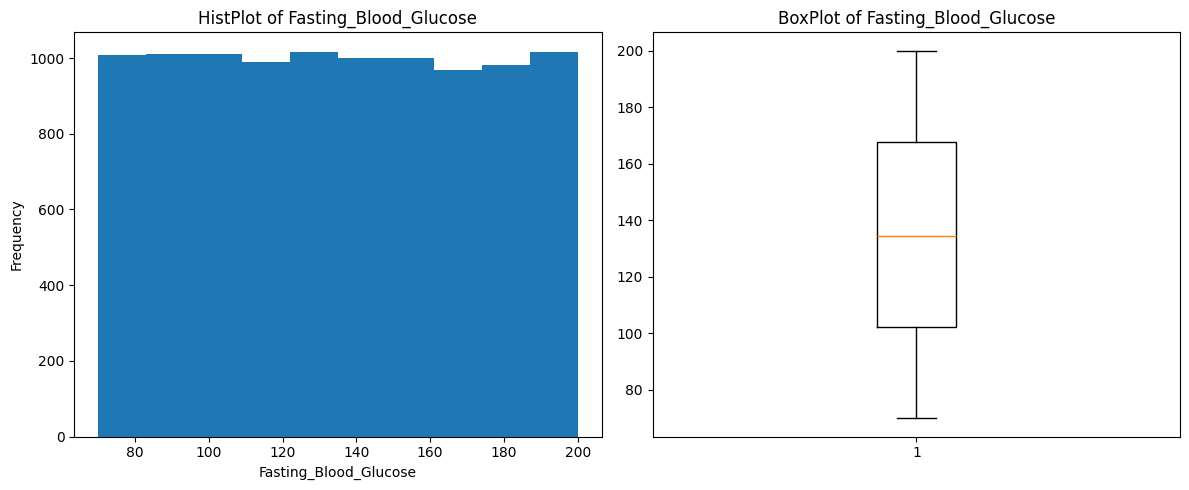

Skewness of Feature: 0.01
Null Values: 0


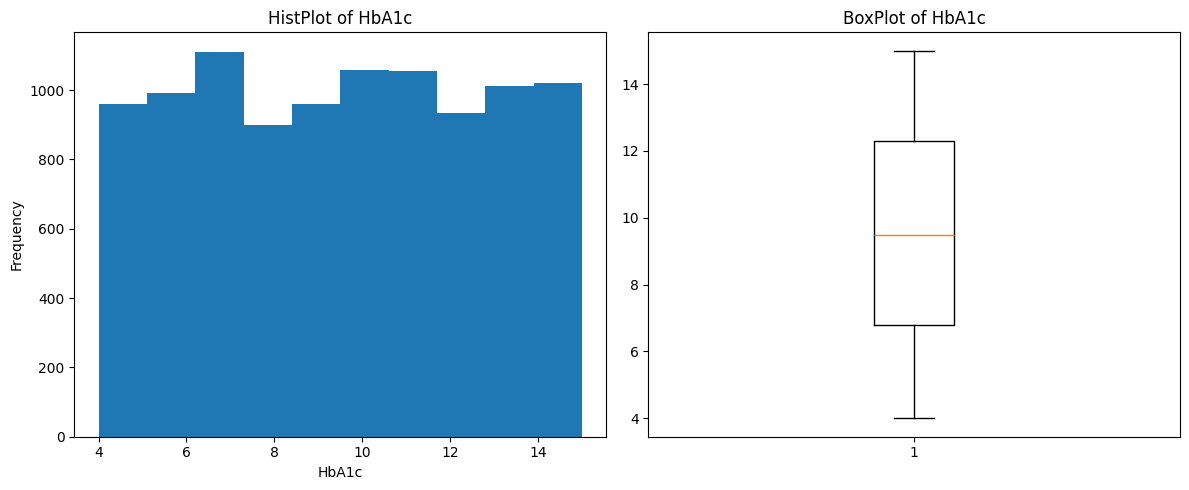

Skewness of Feature: -0.01
Null Values: 0


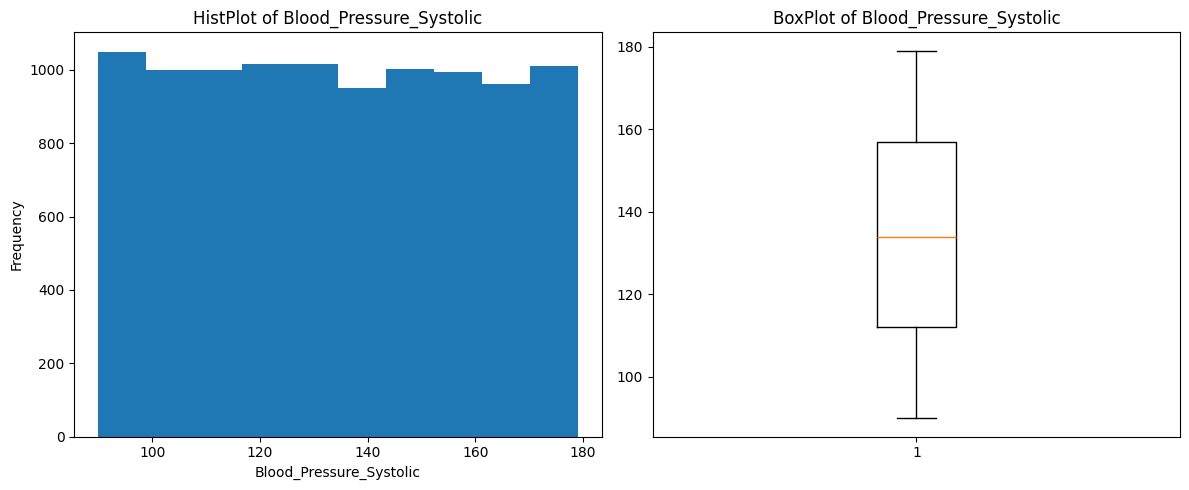

Skewness of Feature: 0.02
Null Values: 0


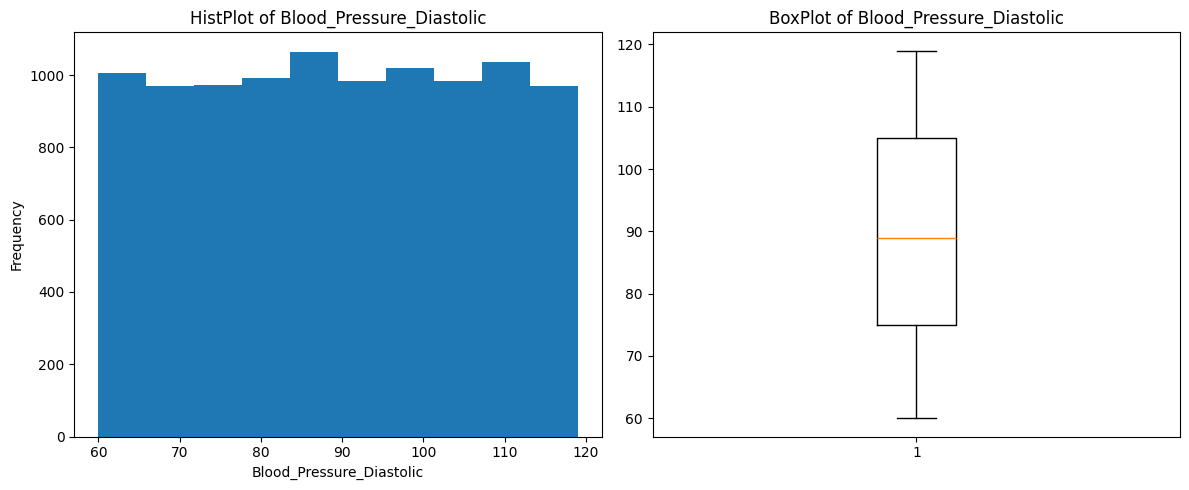

Skewness of Feature: -0.01
Null Values: 0


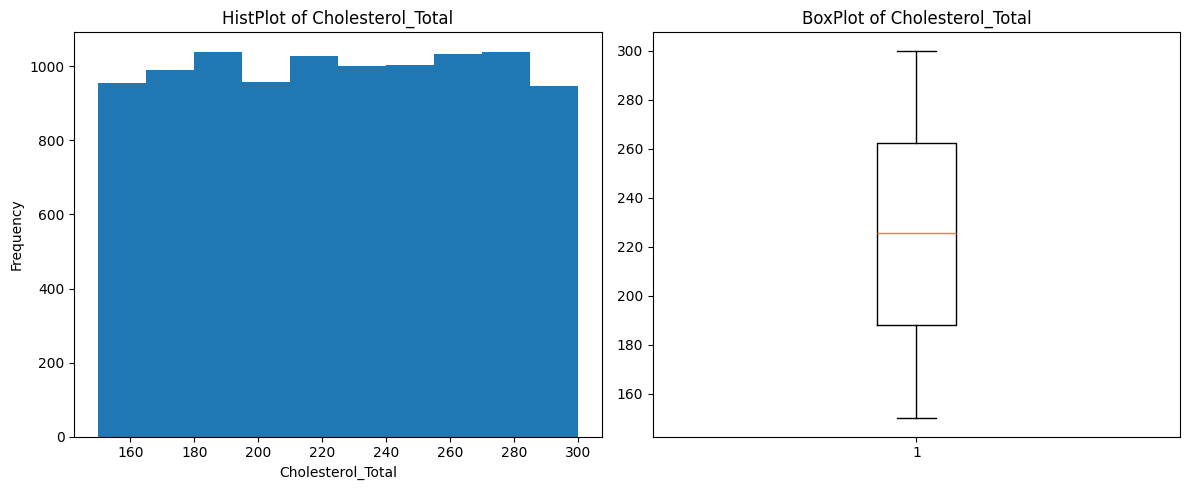

Skewness of Feature: -0.01
Null Values: 0


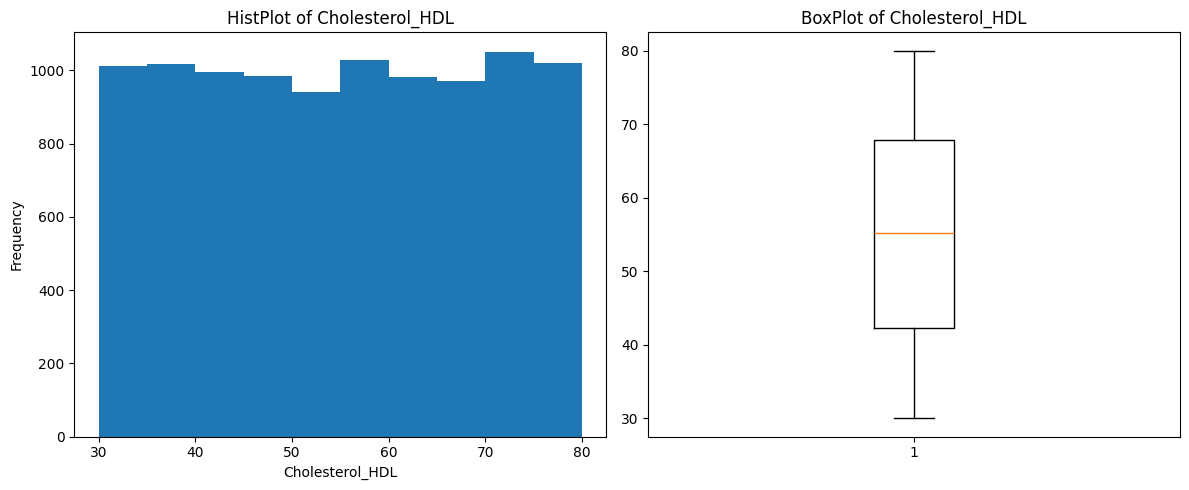

Skewness of Feature: -0.01
Null Values: 0


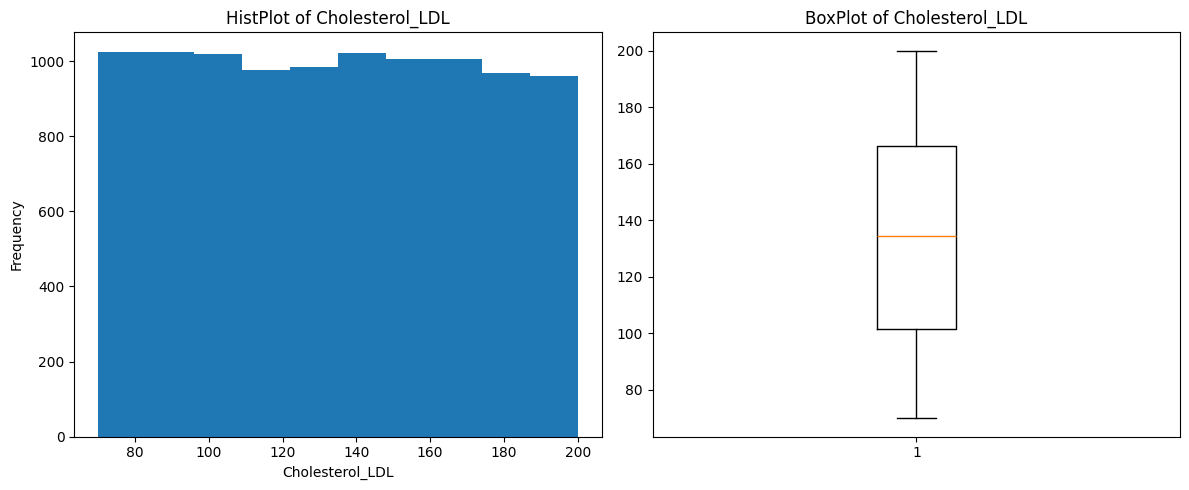

Skewness of Feature: 0.02
Null Values: 0


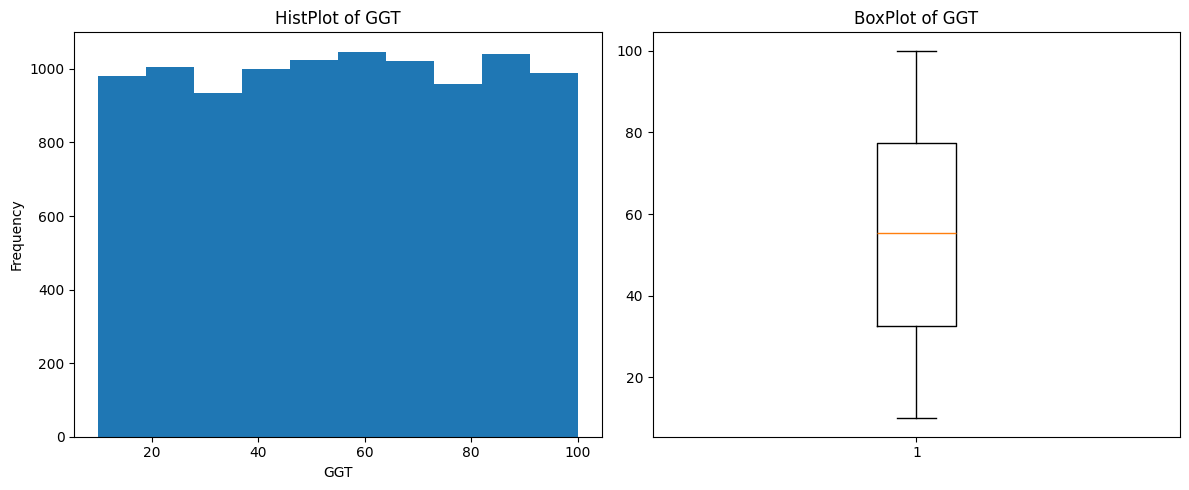

Skewness of Feature: -0.01
Null Values: 0


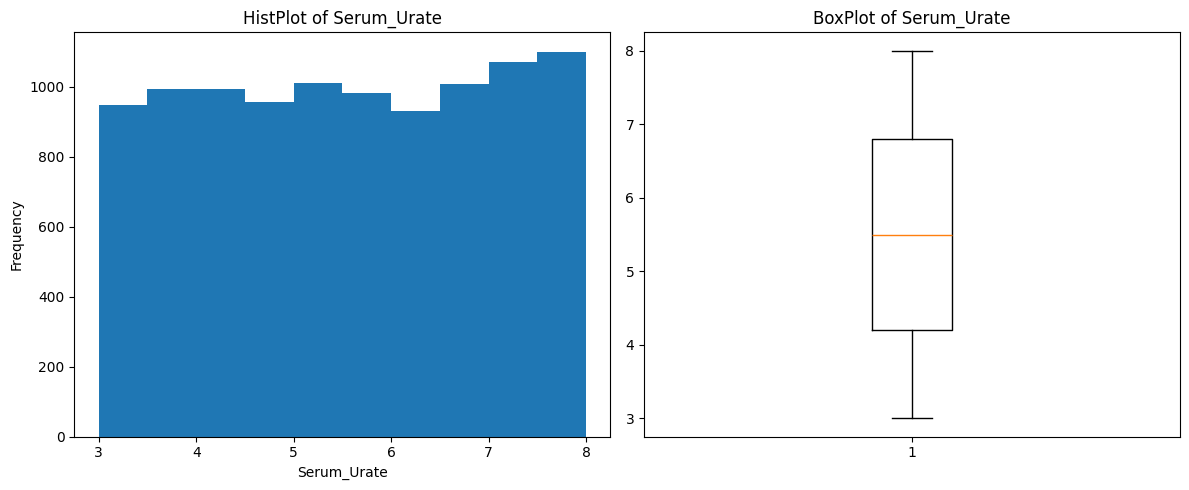

Skewness of Feature: -0.01
Null Values: 0


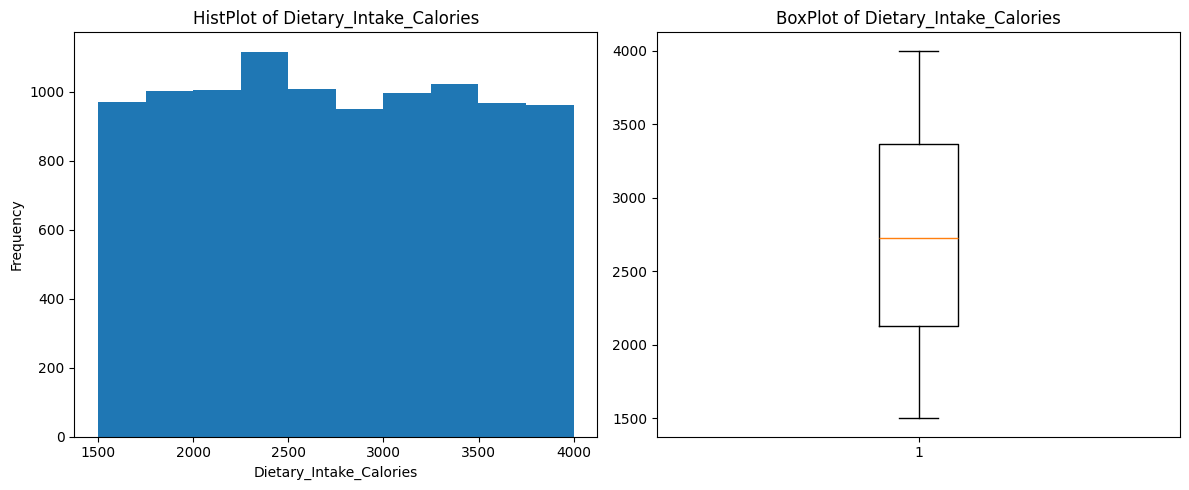

Skewness of Feature: 0.02
Null Values: 0


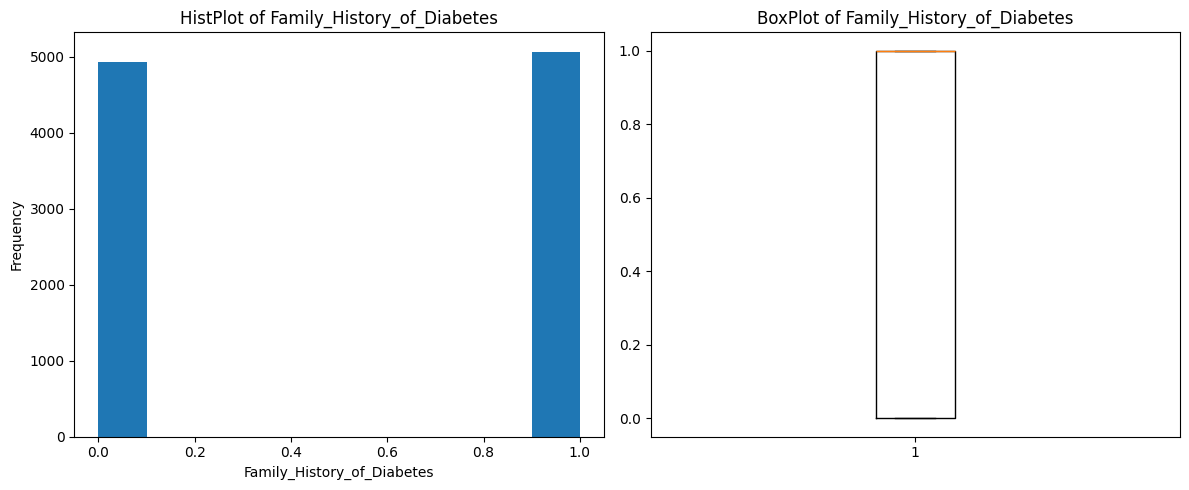

Skewness of Feature: -0.03
Null Values: 0


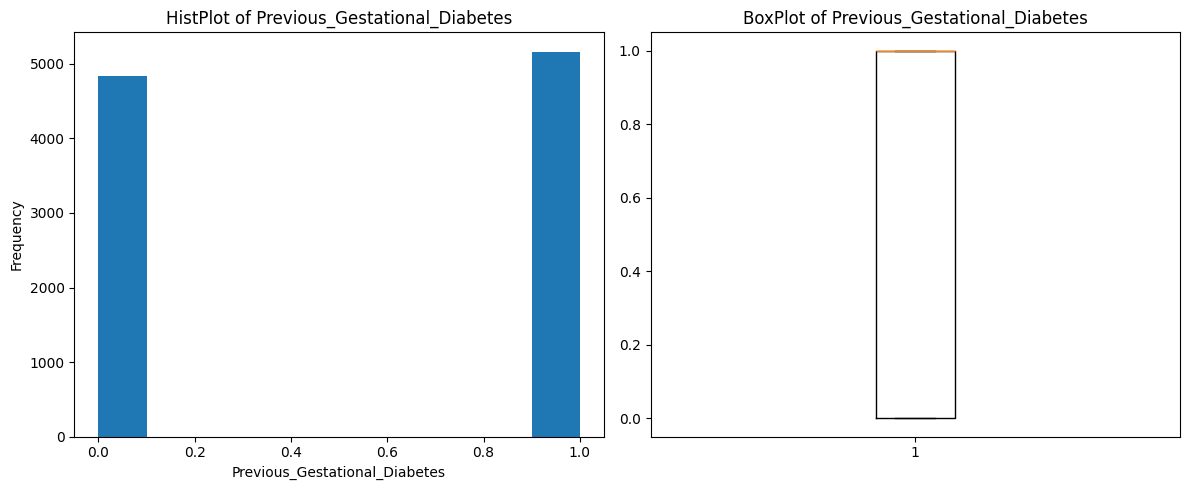

Skewness of Feature: -0.07
Null Values: 0


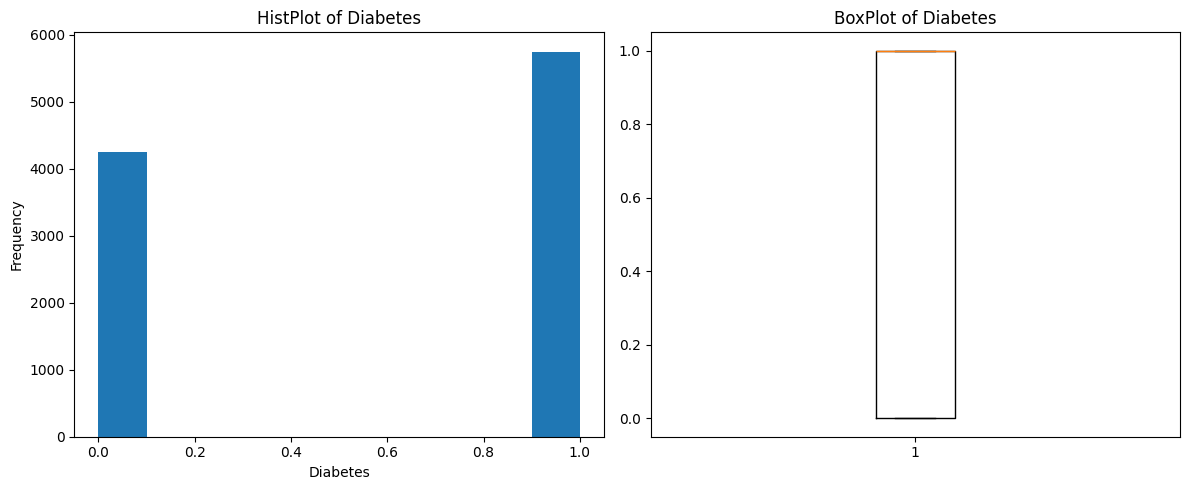

Skewness of Feature: -0.30
Null Values: 0


In [9]:
numerical_distro(df,numerical_cols)


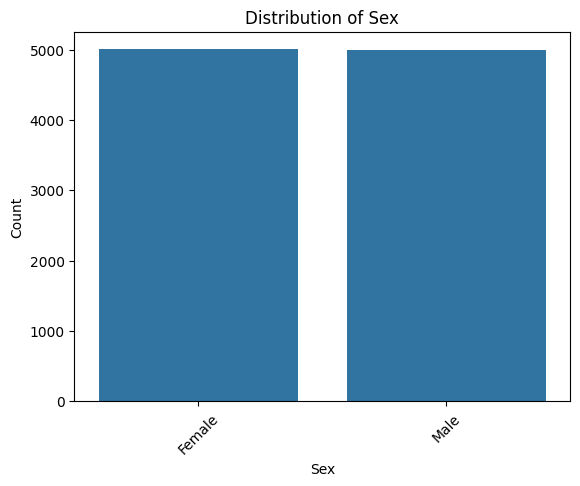

Feature: Sex
Number of Unique Values: 2
Missing Values: 0



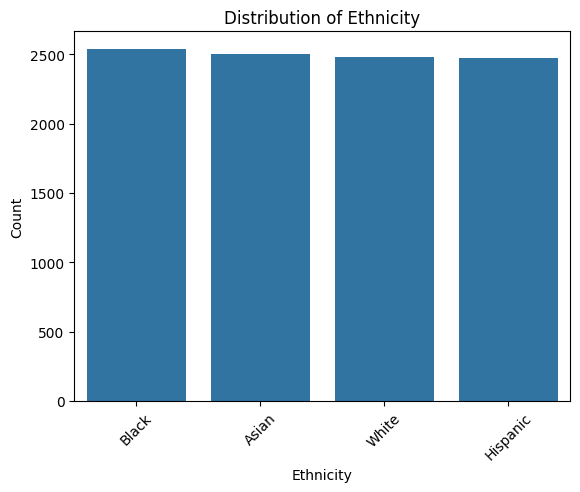

Feature: Ethnicity
Number of Unique Values: 4
Missing Values: 0



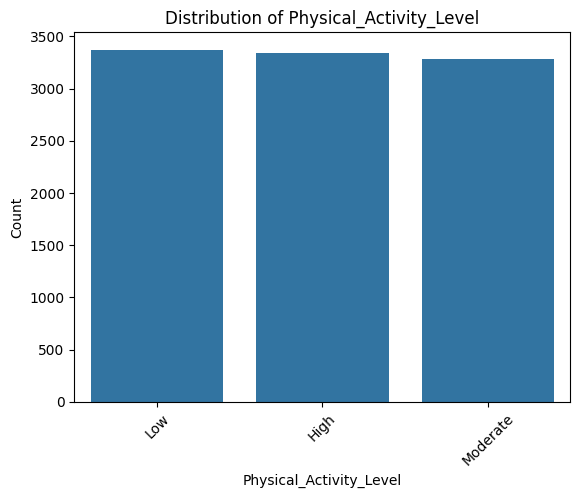

Feature: Physical_Activity_Level
Number of Unique Values: 3
Missing Values: 0



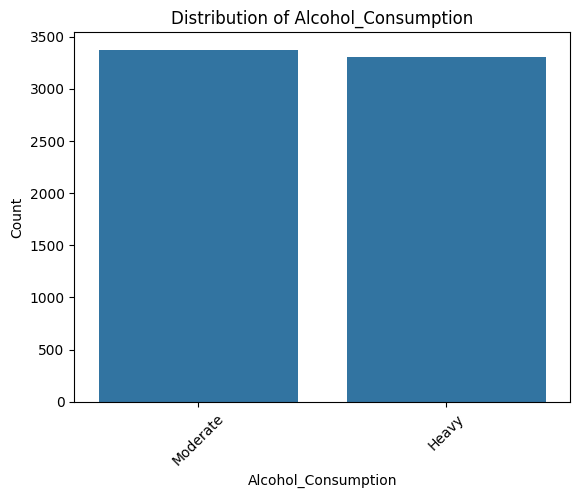

Feature: Alcohol_Consumption
Number of Unique Values: 2
Missing Values: 3320



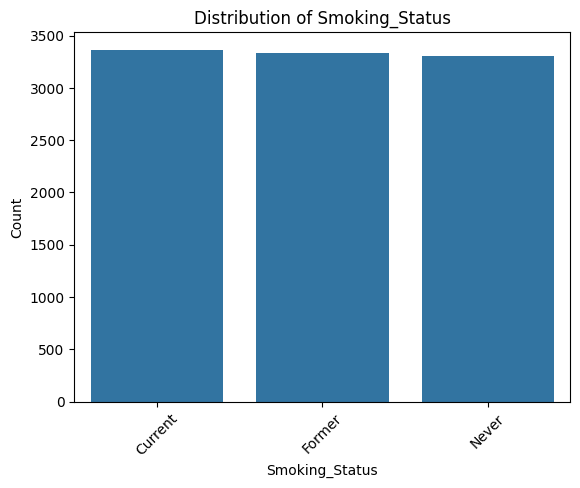

Feature: Smoking_Status
Number of Unique Values: 3
Missing Values: 0



In [10]:
categorical_distro(df,categorical_cols)

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1


In [12]:
from scipy.stats import chi2_contingency

for cat_feature in categorical_cols:
    table = pd.crosstab(df["Alcohol_Consumption"],df[cat_feature])
    chi2, p, dof, expected = chi2_contingency(table)
    print(p)

0.8790667470181295
0.14388748515499916
0.5028224941155922
0.0
0.4479626386914273


In [13]:
df.fillna({'Alcohol_Consumption': 'Missing'}, inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
#df.drop('Unnamed: 0',axis=1,inplace= True)
print(df.isnull().sum())

Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
Diabetes                         0
dtype: int64


In [15]:
df['BMI_Category'] = pd.cut(
    df['BMI'], 
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
df['Total_HDL_Ratio'] = df['Cholesterol_Total'] / df['Cholesterol_HDL']
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 30, 45, 60, 75, 100],
    labels=['<30', '30-45', '45-60', '60-75', '75+']
)
X = df.drop('Diabetes',axis=1)
y = df['Diabetes']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 
                   'Alcohol_Consumption', 'Smoking_Status','BMI_Category',
                   'Age_Group']

# Encoder for categorical data
label_encoders = {col: LabelEncoder() for col in categorical_features}

# Apply LabelEncoder to each categorical column
for col in categorical_features:
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

    # Converting to category type 
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [18]:
print('Training and test sets created with proportions:')
print('Train:', X_train.shape, 'Test:', X_test.shape)

Training and test sets created with proportions:
Train: (8000, 23) Test: (2000, 23)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled=ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [21]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test_scaled)
# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression model: {acc:.4f}')

Accuracy of Logistic Regression model: 0.9960


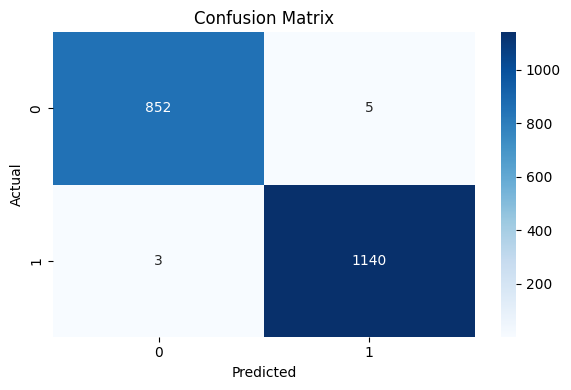

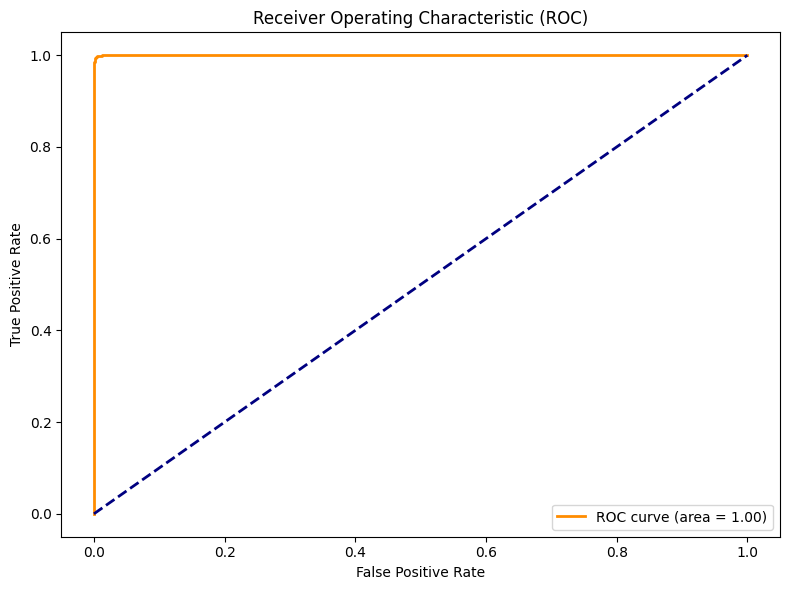

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
y_prob = lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()